# APRENDIZAJE AUTOMATICO (MACHINE LEARNING)
## K-Means (Clustering - algoritmo no supervisado)

In [1]:
import pandas as pd
ruta = '../../../URL/Mall_Customers-2.csv'
df = pd.read_csv(ruta, index_col = 0)

In [2]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [4]:
df.rename({'Annual Income (k$)': 'ingreso',
          'Spending Score (1-100)': 'Ponderacion'}, axis = 1, inplace = True)
df.head()

,Gender,Age,ingreso,Ponderacion
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [5]:
# calculo descriptivo
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
ingreso,200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Ponderacion,200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


In [6]:
df.Gender.value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

## Segmentacion tradicional

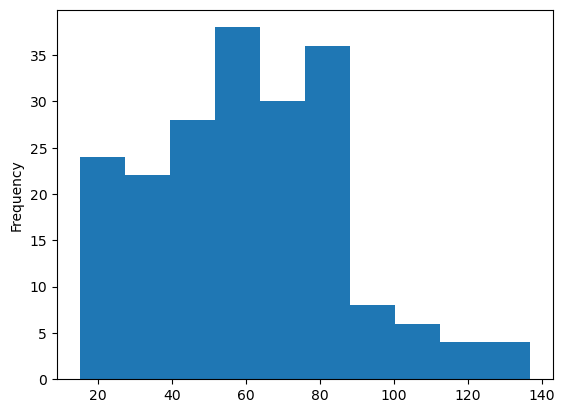

In [7]:
df.ingreso.plot.hist();

In [8]:
import matplotlib.pyplot as plt, seaborn as sns
sns.set()

Text(0.5, 0, 'Ingreso Anual en miles de USD')

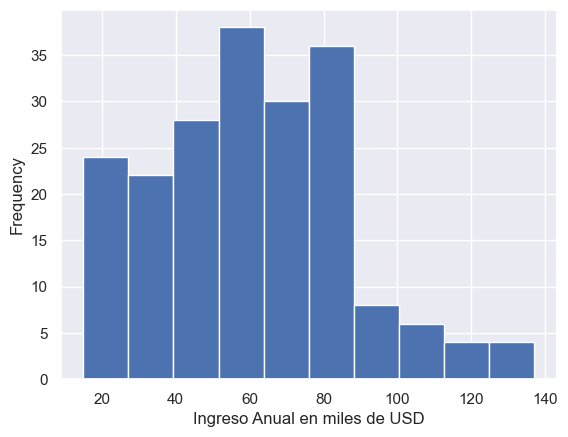

In [9]:
df.ingreso.plot.hist()
plt.xlabel('Ingreso Anual en miles de USD')

### Reglas a seguir:
#### - Si el ingreso < 50 entonces 'Ingreso bajo'
#### - Si 50 <= ingreso <= 90 entones 'Ingreso moderado'
#### - Si ingreso > 90 entonces 'Ingreso alto'

In [10]:
import numpy as np # manejo de matrices

In [11]:
df['Segmento'] = np.where(df.ingreso >= 90, 'Ingreso_alto', 
                         np.where(df.ingreso < 50, 'Ingreso Bajo', 'Ingreso Moderado'))
df

,Gender,Age,ingreso,Ponderacion,Segmento
CustomerID,,,,,
1,Male,19,15,39,Ingreso Bajo
2,Male,21,15,81,Ingreso Bajo
3,Female,20,16,6,Ingreso Bajo
4,Female,23,16,77,Ingreso Bajo
5,Female,31,17,40,Ingreso Bajo
...,...,...,...,...,...
196,Female,35,120,79,Ingreso_alto
197,Female,45,126,28,Ingreso_alto
198,Male,32,126,74,Ingreso_alto


In [12]:
# analisis descriptivo (analisis convencional), agrupamos en funcion a sus segmentos e ingresos
df.groupby('Segmento')['ingreso'].describe()

,count,mean,std,min,25%,50%,75%,max
Segmento,,,,,,,,
Ingreso Bajo,72.0,33.027778,11.091136,15.0,22.50,33.5,43.00,49.0
Ingreso Moderado,106.0,69.377358,10.651584,50.0,61.00,70.0,78.00,88.0
Ingreso_alto,22.0,108.181818,13.661334,93.0,98.25,103.0,118.25,137.0


## Estandarizacion de datos

In [13]:
from sklearn.preprocessing import StandardScaler


In [14]:
scaler = StandardScaler()

In [15]:
col_a_escalar = ['Age', 'ingreso', 'Ponderacion']
datos_a_escalar = df.copy()

In [16]:
datos_a_escalar[col_a_escalar] = scaler.fit_transform(df[col_a_escalar])
df

,Gender,Age,ingreso,Ponderacion,Segmento
CustomerID,,,,,
1,Male,19,15,39,Ingreso Bajo
2,Male,21,15,81,Ingreso Bajo
3,Female,20,16,6,Ingreso Bajo
4,Female,23,16,77,Ingreso Bajo
5,Female,31,17,40,Ingreso Bajo
...,...,...,...,...,...
196,Female,35,120,79,Ingreso_alto
197,Female,45,126,28,Ingreso_alto
198,Male,32,126,74,Ingreso_alto


Text(0.5, 0, 'Ingreso anual en miles de usd')

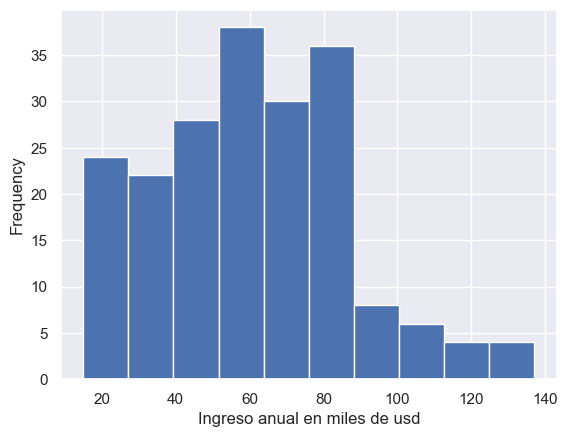

In [17]:
df.ingreso.plot.hist()
plt.xlabel('Ingreso anual en miles de usd')

Text(0.5, 0, 'Ingreso anual en miles de usd')

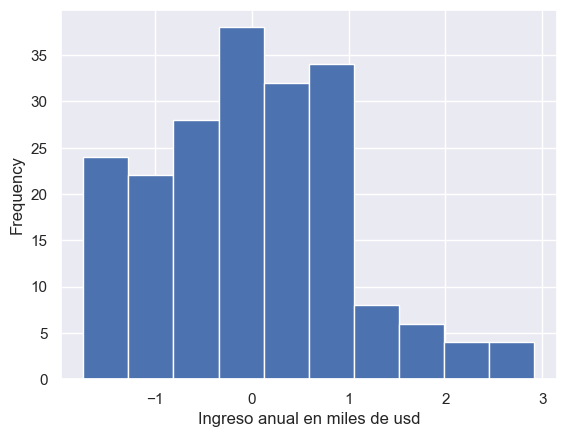

In [18]:
datos_a_escalar.ingreso.plot.hist()
plt.xlabel('Ingreso anual en miles de usd')

In [19]:
# creamos nuestros clusters
cluster_cols = ['ingreso', 'Ponderacion']

<Axes: xlabel='ingreso', ylabel='Ponderacion'>

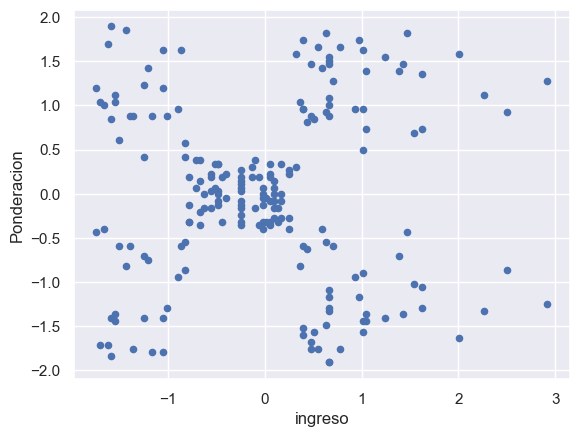

In [20]:
datos_a_escalar.plot.scatter(x='ingreso', y ='Ponderacion')

## Uso de KMeans

In [21]:
from sklearn.cluster import KMeans

In [22]:
modelo = KMeans(n_clusters = 5,random_state = 28) #elegir el numero de clusters, random_state es para tener los mismos datos

In [23]:
modelo.fit(datos_a_escalar[cluster_cols]) # ponemos los datos escalaros y ponemos solo los dos datos que usamos para la segmenta
                                          # cion 

C:\Users\andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\andre\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\andre\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(
C:\Users\andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid

KMeans(n_clusters=5, random_state=28)

In [24]:
datos_a_escalar

,Gender,Age,ingreso,Ponderacion,Segmento
CustomerID,,,,,
1,Male,-1.424569,-1.738999,-0.434801,Ingreso Bajo
2,Male,-1.281035,-1.738999,1.195704,Ingreso Bajo
3,Female,-1.352802,-1.700830,-1.715913,Ingreso Bajo
4,Female,-1.137502,-1.700830,1.040418,Ingreso Bajo
5,Female,-0.563369,-1.662660,-0.395980,Ingreso Bajo
...,...,...,...,...,...
196,Female,-0.276302,2.268791,1.118061,Ingreso_alto
197,Female,0.441365,2.497807,-0.861839,Ingreso_alto
198,Male,-0.491602,2.497807,0.923953,Ingreso_alto


In [25]:
datos_a_escalar['Segmento2'] = modelo.predict(datos_a_escalar[cluster_cols])

In [26]:
datos_a_escalar.Segmento.value_counts()

Segmento
Ingreso Moderado    106
Ingreso Bajo         72
Ingreso_alto         22
Name: count, dtype: int64

In [27]:
datos_a_escalar.Segmento2.value_counts()

Segmento2
1    81
0    39
3    35
4    23
2    22
Name: count, dtype: int64

In [28]:
marcador = ['x', '*', '.', '|', '_']

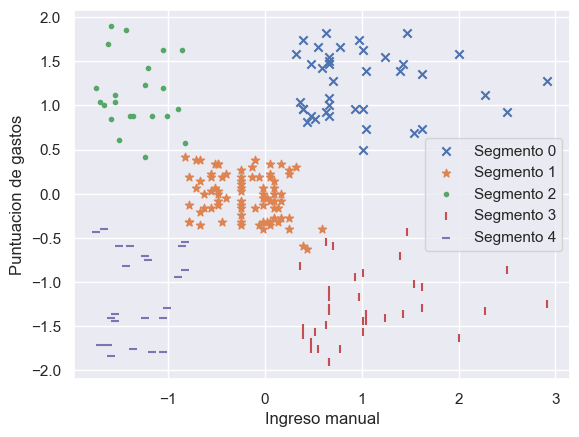

In [29]:
for segmento in range(5):
    temporal = datos_a_escalar[datos_a_escalar.Segmento2 == segmento]
    plt.scatter(temporal.ingreso, temporal.Ponderacion, marker = marcador[segmento], label = 'Segmento ' + str(segmento))
    plt.xlabel('Ingreso manual')
    plt.ylabel('Puntuacion de gastos')
    plt.legend()
plt.show()

## Utilizar mas de 2 dimensiones para el modelo de aprendizaje automatico

In [32]:
cluster_cols = ['Age', 'ingreso', 'Ponderacion']
datos_a_escalar[cluster_cols].head()

,Age,ingreso,Ponderacion
CustomerID,,,
1,-1.424569,-1.738999,-0.434801
2,-1.281035,-1.738999,1.195704
3,-1.352802,-1.700830,-1.715913
4,-1.137502,-1.700830,1.040418
5,-0.563369,-1.662660,-0.395980


In [33]:
modelo2 = KMeans(n_clusters = 4, random_state = 28)

In [34]:
modelo2.fit(datos_a_escalar[cluster_cols])

C:\Users\andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=28)

In [35]:
datos_a_escalar['Segmento3'] = modelo2.predict(datos_a_escalar[cluster_cols])

In [36]:
datos_a_escalar

,Gender,Age,ingreso,Ponderacion,Segmento,Segmento2,Segmento3
CustomerID,,,,,,,
1,Male,-1.424569,-1.738999,-0.434801,Ingreso Bajo,4,1
2,Male,-1.281035,-1.738999,1.195704,Ingreso Bajo,2,1
3,Female,-1.352802,-1.700830,-1.715913,Ingreso Bajo,4,1
4,Female,-1.137502,-1.700830,1.040418,Ingreso Bajo,2,1
5,Female,-0.563369,-1.662660,-0.395980,Ingreso Bajo,4,1
...,...,...,...,...,...,...,...
196,Female,-0.276302,2.268791,1.118061,Ingreso_alto,0,0
197,Female,0.441365,2.497807,-0.861839,Ingreso_alto,3,3
198,Male,-0.491602,2.497807,0.923953,Ingreso_alto,0,0


In [37]:
# analisis de componentes principales, es un metodo estadistico para reducir la dimension de algo, pero se preserva la mayor cantidad de informacion
from sklearn import decomposition

In [38]:
pca = decomposition.PCA(n_components = 2) # generamos una decomposicion de dos componentes
pca_resultado = pca.fit_transform(datos_a_escalar[cluster_cols])
pca_resultado

array([[-6.15720019e-01, -1.76348088e+00],
       [-1.66579271e+00, -1.82074695e+00],
       [ 3.37861909e-01, -1.67479894e+00],
       [-1.45657325e+00, -1.77242992e+00],
       [-3.84652078e-02, -1.66274012e+00],
       [-1.48168526e+00, -1.73500173e+00],
       [ 1.09461665e+00, -1.56610230e+00],
       [-1.92630736e+00, -1.72111049e+00],
       [ 2.64517786e+00, -1.46084721e+00],
       [-9.70130513e-01, -1.63558108e+00],
       [ 2.49568861e+00, -1.47048914e+00],
       [-1.45688256e+00, -1.66436050e+00],
       [ 2.01018729e+00, -1.45329897e+00],
       [-1.41321072e+00, -1.61776746e+00],
       [ 1.00042965e+00, -1.49579176e+00],
       [-1.56943170e+00, -1.62502669e+00],
       [ 2.94060318e-01, -1.49425585e+00],
       [-1.31624924e+00, -1.57216383e+00],
       [ 1.31669910e+00, -1.37243404e+00],
       [-1.43679899e+00, -1.51039469e+00],
       [ 2.88561175e-01, -1.37988135e+00],
       [-1.26018513e+00, -1.45723906e+00],
       [ 1.66684303e+00, -1.27396755e+00],
       [-9.

In [39]:
datos_a_escalar['PC1'] = pca_resultado[:, 0]
datos_a_escalar['PC2'] = pca_resultado[:, 1]
datos_a_escalar

,Gender,Age,ingreso,Ponderacion,Segmento,Segmento2,Segmento3,PC1,PC2
CustomerID,,,,,,,,,
1,Male,-1.424569,-1.738999,-0.434801,Ingreso Bajo,4,1,-0.615720,-1.763481
2,Male,-1.281035,-1.738999,1.195704,Ingreso Bajo,2,1,-1.665793,-1.820747
3,Female,-1.352802,-1.700830,-1.715913,Ingreso Bajo,4,1,0.337862,-1.674799
4,Female,-1.137502,-1.700830,1.040418,Ingreso Bajo,2,1,-1.456573,-1.772430
5,Female,-0.563369,-1.662660,-0.395980,Ingreso Bajo,4,1,-0.038465,-1.662740
...,...,...,...,...,...,...,...,...,...
196,Female,-0.276302,2.268791,1.118061,Ingreso_alto,0,0,-1.093705,2.215577
197,Female,0.441365,2.497807,-0.861839,Ingreso_alto,3,3,0.800448,2.540748
198,Male,-0.491602,2.497807,0.923953,Ingreso_alto,0,0,-1.119709,2.445169
